In [1]:
import utils
import os
os.chdir(utils.ROOT)

In [2]:
from pipeline import runpipeline

Loading ACL 2.0 corpus:  18%|█▊        | 55/300 [00:00<00:00, 414.94it/s]

STEP 1: LOAD GOLD DOCUMENTS AND CONCEPTS
Loading gold docs: 

Removing unigram Concepts: 100%|██████████| 300/300 [00:00<00:00, 1373.74it/s]

Retrieving gold standard concepts ... 


Loading ACL 2.0 corpus: 100%|██████████| 300/300 [00:00<00:00, 4032.08it/s]

Skipped 0 concepts not bounded at tokens boundaries and filtered out 0 with the POS-tag filter: None
STEP 2: Run pre-processing and concept extraction pipeline
--- Running pre-processing pipeline ---
Opening CoreNLP annotator server. It may still be running after termination if shut-down is not stated explicitly.



Creating raw text corpus file:  16%|█▋        | 49/300 [00:00<00:00, 489.20it/s]

CoreNLP server shut down successfully.


Extracting candidates:   0%|          | 0/300 [00:00<?, ?it/s]

Making colibri class file ...
Encoding corpus ...
--- Running concept extraction pipeline ---


Extracting candidates: 100%|██████████| 300/300 [00:02<00:00, 145.26it/s]


Extracted 6437 continuous candidates and 1314 discontinuous candidates.
Scoring, ranking and filtering concepts
Calculating C-values
Calculating Rectified Frequencies
Calculating TF-IDF values
Calculating Glossex values
Loading reference model for the first time.
Calculating length normalized PMI values
Calculating Term Coherence values
Calculating votes between rankers
Loading MeSH terms ...


Cleaning documents: 100%|██████████| 300/300 [00:00<00:00, 341555.70it/s]



STEP 3: EVALUATE
THRESHOLD = 1
Summary of CorpusReport for Concept
# extracted concepts: 1593
Precision: 0.525   (highest: 1.000, lowest: 0.000)
Recall:    0.278   (highest: 1.000, lowest: 0.000)
Error analysis of CorpusReport for Concept
516 (68.25%) FP's occur elsewhere as a gold standard concept.
75 (9.92%) FP's were verified in ontology source(s).
550 (72.75%) FP's were accounted for in this analysis.
Corrected precision: 0.871
141 (6.48%) FN's are above max n.
44 (2.02%) FN's cannot be captured by the used POS-tag filter.
1972 (90.67%) FN's occur less often than the frequency threshold.
1990 (91.49%) FN's were accounted for in this analysis.
Corrected recall: 0.819

Summary of CorpusReport for DiscontinuousConcept
# extracted concepts: 85
Precision: 0.000   (highest: 0.000, lowest: 0.000)
Recall:    0.000   (highest: 0.000, lowest: 0.000)
Error analysis of CorpusReport for DiscontinuousConcept
70 (82.35%) FP's occur elsewhere as a gold standard concept.
12 (14.12%) FP's were veri

In [3]:
import pandas as pd
data = pd.DataFrame(
    {'freq_threshold': list(range(4, 5, 2)),
     'all_prec': [r.precision() for r in runpipeline.all_corpus_reports],
     'all_corr_prec': [r.corrected_precision() for r in runpipeline.all_corpus_reports],
     'all_recall': [r.recall() for r in runpipeline.all_corpus_reports],
     'all_corr_recall': [r.corrected_recall() for r in runpipeline.all_corpus_reports],
     'all_n_concepts': [len(r.predicted) for r in runpipeline.all_corpus_reports],
     'dc_prec': [r.precision() for r in runpipeline.all_dc_reports],
     'dc_corr_prec': [r.corrected_precision() for r in runpipeline.all_dc_reports],
     'dc_recall': [r.recall() for r in runpipeline.all_dc_reports],
     'dc_corr_recall': [r.corrected_recall() for r in runpipeline.all_dc_reports],
     'dc_n_concepts': [len(r.predicted) for r in runpipeline.all_dc_reports],
     'types_prec': [r.precision() for r in runpipeline.all_types_reports],
     'types_corr_prec': [r.corrected_precision() for r in runpipeline.all_types_reports],
     'types_recall': [r.recall() for r in runpipeline.all_types_reports],
     'types_corr_recall': [r.corrected_recall() for r in runpipeline.all_types_reports],
     'types_n_concepts': [len(r.predicted) for r in runpipeline.all_types_reports]
    }
)

In [4]:
import seaborn as sns

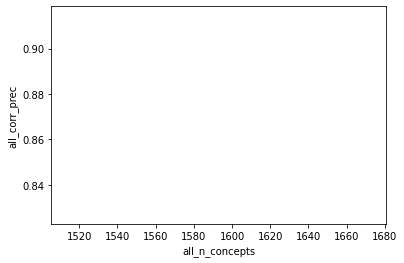

In [5]:
sns.lineplot(data['all_n_concepts'], data['all_corr_prec'])

In [6]:
print(runpipeline.configs.__dict__)

{'freq_threshold': 2, 'c_value_threshold': 2, 'max_n': 5, 'skipgrams': False, 'bridge_strength_threshold': 1, 'freq_factor': 1, 'coord_dcs': True, 'hypernym_dcs': True, 'consider_dcs_in_ranking': False, 'extraction_filter': 'simple'}


In [7]:
if input('Save the results? ') == 'y':
    save_dir = '/home/kasper/Dropbox/Masters thesis/pipeline-results/'
    name = input('File name: ')
    data.to_csv(save_dir + name + '.csv', )

Save the results? 


In [8]:
dc_ranks = {
    c: runpipeline.metrics[c.normalized_concept()][runpipeline.cm.Metrics.VOTER]
    if runpipeline.cm.Metrics.VOTER in runpipeline.metrics[c.normalized_concept()]
    else 0 for c in runpipeline.all_dc_reports[0].predicted}

In [9]:
from stats import conceptstats
import math

In [11]:
for dc, score in sorted(dc_ranks.items(), key=lambda x: x[1], reverse=True):
    bridge = dc.get_bridges()[0]
    bridge_strength = conceptstats.ngram_pmi(bridge[0].lemma(), bridge[1].lemma(), runpipeline.ngram_model)\
        + math.log10(runpipeline.ngram_model[(bridge[0].lemma(), bridge[1].lemma())])
    print(' '.join(dc.normalized_concept()), dc.get_context(), score, bridge_strength, sep='\t')

speech recognition	theme is the use of speech and text-image recognition to retrieve arbitra	0.2964938220586285	9.921950477333773
dialogue system	on, developed for a dialogue translation system. The system utilize	0.2614910156366174	6.8788057145009365
word vector	y of distributional word feature vectors and its impact on w	0.22206702380748333	3.2628968373665455
training data	rocess of obtaining training and test data for subcategorizati	0.15421451956650267	9.172128774263845
training data	d match between the training and test data with respect to top	0.15421451956650267	9.172128774263845
dialog system	oach for creating a dialog management system based on a Construc	0.14142014890031696	7.01031896747316
translation system	al performance of a translation memory system. We take a selectio	0.10472307272372758	6.651197622742385
natural language system	incorporated into a natural language generation system.	0.10441124897068303	5.063651267080507
natural language system	ount of a prototype natur